In [50]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)

import seaborn as sns

from astropy.io import fits

In [21]:
tb = fits.open("../data/P200+55_table_100.fits")

In [22]:
dat = fits.open("../data/P200+55-mosaic.fits")[0]
dat

In [23]:
(~np.isnan(dat.data)).sum(), (np.isnan(dat.data)).sum()

(58928339, 16101905)

In [25]:
tb.info()

Filename: ../data/P200+55_table_100.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1                1 BinTableHDU    454   55R x 119C   [22A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 1A, 7A, D, J, 27A, D, D, D, D, D, D, D, D, D, 4A, 19A, 4A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 4A, 1A, D, 4A, 23A, I, D, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [26]:
dat.data.shape

(8662, 8662)

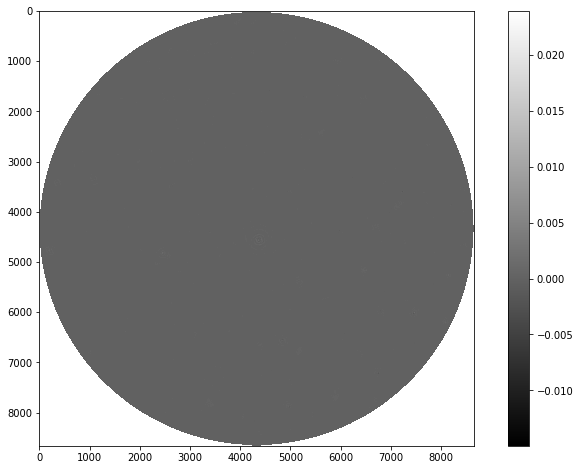

In [38]:
plt.imshow(dat.data, cmap="gray")
plt.colorbar();

In [62]:
d = np.nan_to_num(dat.data, 0.0)

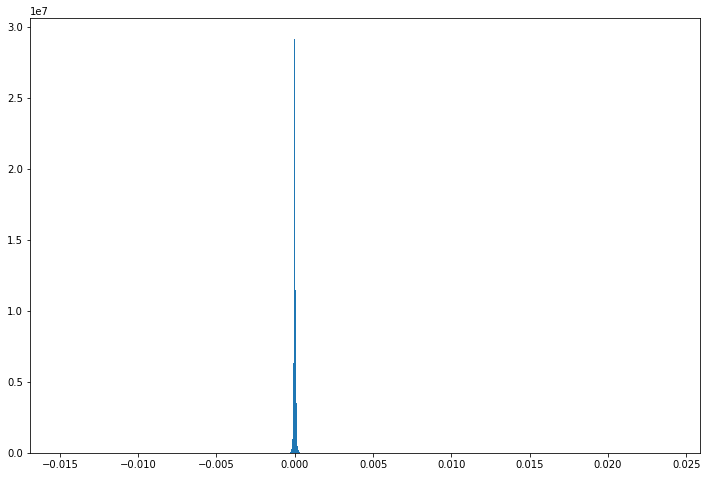

In [63]:
NBINS = 1000
plt.hist(dat.data.flatten(), NBINS);

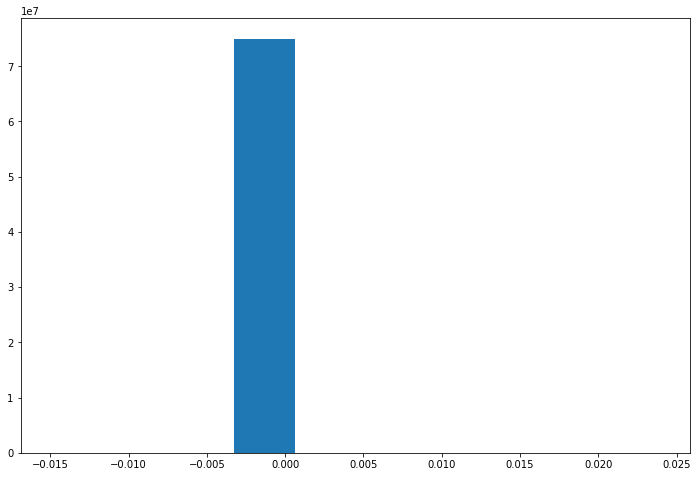

In [64]:
plt.hist(d.flatten());

In [111]:
def calc_pixel_indices_above_n_sigma(n, data):
    sd = data.flatten().std()
    points_of_interest = (np.abs(data) > n * sd)
    return np.where(points_of_interest)

In [123]:
def plot_interesting_area(i, size, indices_of_interest, cmap="gray"):
    margin = size // 2
    index = idx[0][i], idx[1][i]
    
    vl, vu = np.max([0, index[0] - margin]), np.min([d.shape[0] - 1, index[0] + margin])
    hl, hu = np.max([0, index[1] - margin]), np.min([d.shape[1] - 1, index[1] + margin])
    
    dsub = d[vl:vu, hl:hu]
    plt.imshow(dsub, cmap=cmap)
    plt.colorbar();    

In [127]:
ioi = calc_pixel_indices_above_n_sigma(5, d)

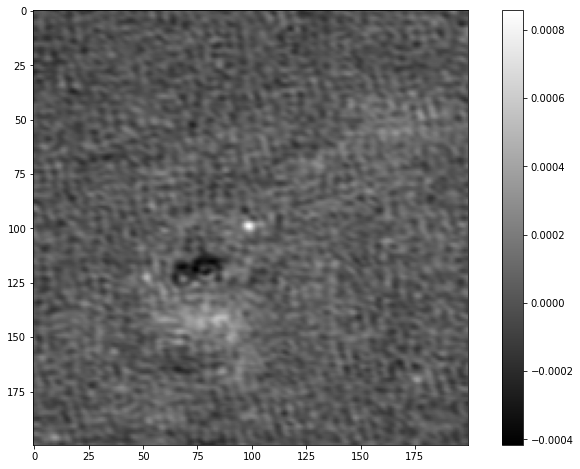

In [128]:
plot_interesting_area(23, 200, ioi, "gray")

In [129]:
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

In [143]:
ob = tb[1].data[0]

In [165]:
tb[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  964 / length of dimension 1                          
NAXIS2  =                   55 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  119 / number of table fields                         
TTYPE1  = 'Source_Name'        / The radio name of the source, automatically gen
TFORM1  = '22A     '                                                            
TTYPE2  = 'RA      '           / Position from PyBDSF or combination of PyBDSF c
TFORM2  = 'D       '                                                            
TUNIT2  = 'deg     '        

In [158]:
h = tb[0]

In [163]:
print(h.header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T / More exts following                            DATE    = '2021-10-25'         / Date file was written                          END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [144]:
ob

('ILTJ132110.54+545110.7', 200.293909749587, 0.303260768186797, 54.8529867704702, 0.261141580749253, 0.659300213527281, 0.0690607749792504, 0.729233076929764, 0.115874417906509, nan, 0.723528092338902, nan, 0.603848806047152, 2.77274582608878, 0.723528092338902, 0.540174934658628, 0.603848806047152, 72.82680417306, 47.7623137510313, 72.8268041730578, 47.7623137510313, 0.0675789269735105, 'S', 'P200+55', 0.56, 1, 'PSO J132110.488+545111.154', 200.29366724, 54.85310473, 793.439055402789, nan, nan, nan, nan, nan, nan, 'None', 'J132110.49+545111.2', 'None', 12.4826342442498, 0.906411921878356, 21.1592343865902, 0.0788394677558601, 36.4780465869548, 0.833724730660886, 19.9949210658824, 0.0248150657607982, 57.2158052924756, 1.06892324069557, 19.5062099628451, 0.0202840571167001, 76.8155150787705, 3.53062491120197, 19.1863776324546, 0.0499030344010848, 92.7649020670685, 5.40965974877329, 18.9815407739417, 0.0633155785624552, 1.18480912078901e-05, 1.02620072534898e-06, 3.28104566904421e-05, 8.